### IESB
___
### Pós Graduação em Inteligência Artificial
#### Disciplina: Aprendizado não Supervisionado
#### Docente: Mateus Mendelson
#### Discente: Henrique Brandão

#### Atividades com dados `base-covid-19-us.csv`

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
df = pd.read_csv('base-covid-19-us.csv')
df.shape

(1570, 3)

In [3]:
df.head()

,county,cases,deaths
0,Abbeville,84,0
1,Acadia,741,21
2,Accomack,116,0
3,Ada,4264,41
4,Adair,325,8


In [4]:
df.describe()

,cases,deaths
count,1570.000000,1570.000000
mean,2633.903822,69.952229
std,24352.089822,842.722792
min,1.000000,0.000000
25%,34.000000,0.000000
50%,133.500000,0.000000
75%,632.750000,17.000000
max,868824.000000,31887.000000


In [5]:
pontos = df[['cases', 'deaths']].values

<IPython.core.display.Javascript object>


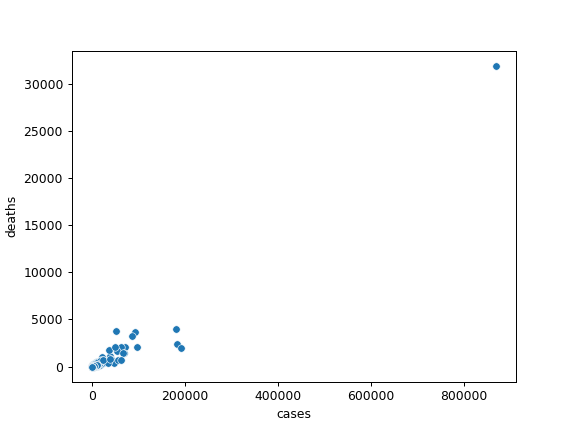

In [6]:
sns.scatterplot(x=df['cases'], y=df['deaths'])
plt.show()

In [7]:
from math import sqrt
from random import choice

In [8]:
def sortear_centroide_inicial(pontos):
    """Sorteia um dos pontos da amostra para ser um centroide inicial"""
    return choice(pontos)

In [9]:
def distancia(u, v):
    """
    Calcula a distância euclidiana entre vetores.
    Análogo a np.linalg.norm().
    
    :param list(float) u: vetor n-dimensional
    :param list(float) v: vetor n-dimensional
    :return distância: float
    """
    delta = []
    for i in range(len(u)):
        delta.append((u[i] - v[i])**2)
    return sqrt(sum(delta))

In [10]:
def otimo(antigos, novos, parada: float):
    delta = []
    for i in range(len(novos)):
        delta.append(distancia(novos[i], antigos[i]))
    if sum(delta) <= parada:
        return True
    else:
        return False

In [11]:
def fit_k_means(pontos, k: int, parada: float, max_iter: int):
    print(f'Treinando com {pontos.shape[0]} registros')
    clusters = {}
    centroides = []
    for i in range(k):
        # 2 - sortear centroides iniciais
        centroides.append(sortear_centroide_inicial(pontos))
    for i in range(max_iter):
        print(f'\n# Iteração no. {i} ----------------------------------------- #')
        print(f'Centroides:\n{centroides}')
        # 1 - definir a quantidade de clusters/zerar os clusters
        for c in range(k):
            clusters[f'c_{c}'] = []
        # 3 - calcular a distância de cada ponto para cada centroide
        for p in pontos:
            _dists = [distancia(p, c) for c in centroides]
            # 4 - associar cada ponto ao centroide mais próximo
            _clust = _dists.index(min(_dists))
            clusters[f'c_{_clust}'].append(p)
        for c in clusters:
            print(f"Cluster {c} tem {len(clusters[c])} elementos")
        # 5 - atualizar as coords de cada centroide
        novos_centroides = []
        for c in range(k):
            _pontos = clusters[f'c_{c}']
            novos_centroides.append(sum(_pontos)/len(_pontos))
        # 6 - verificar parada
        if otimo(centroides, novos_centroides, parada):
            break
        else:
            centroides = novos_centroides
    # 7 - Retornar os centroides
    return centroides, clusters

In [12]:
centroides, clusters = fit_k_means(pontos=pontos, k=3, parada=0.001, max_iter=300)

Treinando com 1570 registros

# Iteração no. 0 ----------------------------------------- #
Centroides:
[array([836,  11]), array([45,  0]), array([8680,  417])]
Cluster c_0 tem 359 elementos
Cluster c_1 tem 1095 elementos
Cluster c_2 tem 116 elementos

# Iteração no. 1 ----------------------------------------- #
Centroides:
[array([1526.60445682,   36.63509749]), array([103.8347032 ,   2.91324201]), array([29943.78448276,   805.88793103])]
Cluster c_0 tem 313 elementos
Cluster c_1 tem 1221 elementos
Cluster c_2 tem 36 elementos

# Iteração no. 2 ----------------------------------------- #
Centroides:
[array([3652.4057508 ,   85.11501597]), array([154.56019656,   3.96150696]), array([77869.66666667,  2176.30555556])]
Cluster c_0 tem 204 elementos
Cluster c_1 tem 1348 elementos
Cluster c_2 tem 18 elementos

# Iteração no. 3 ----------------------------------------- #
Centroides:
[array([7119.75490196,  168.62745098]), array([258.85163205,   6.60237389]), array([129659.27777778,   3695.83

In [13]:
def _to_df(clusters: dict):
    saida = []
    for k in clusters:
        for ponto in clusters[k]:
            _ = (ponto[0], ponto[1], k)
            saida.append(_)
    return saida

In [14]:
df_kmeans = pd.DataFrame(_to_df(clusters), columns=['cases', 'deaths', 'cluster'])
df_kmeans.shape

(1570, 3)

In [15]:
df_kmeans.head()

,cases,deaths,cluster
0,71121,2117,c_0
1,97593,2079,c_0
2,63344,2129,c_0
3,54023,1704,c_0
4,51873,3741,c_0


In [16]:
cent_xs = [c[0] for c in centroides]
cent_ys = [c[1] for c in centroides]

<IPython.core.display.Javascript object>


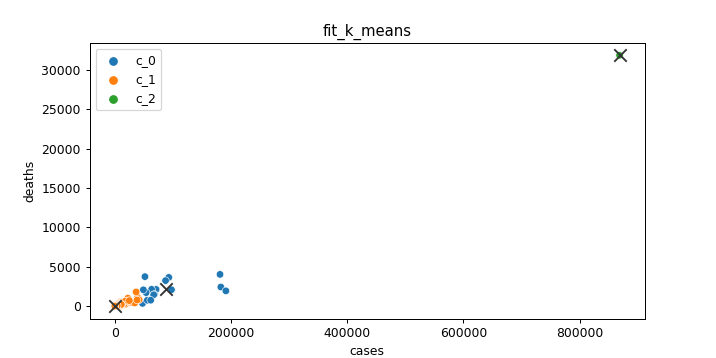

/home/hbrandao/Projects/post-grad-iesb-ai/venv/lib/python3.8/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


In [17]:
plt.figure(figsize=(8, 4), dpi=100)
sns.scatterplot(data=df_kmeans, x='cases', y='deaths', hue=df_kmeans['cluster'])
sns.scatterplot(x=cent_xs, y=cent_ys, marker='x', s=100, color='.2', linewidth=1.5)
plt.title('fit_k_means')
plt.show()

In [18]:
from sklearn.cluster import KMeans

In [19]:
kmeans = KMeans(init='random', n_clusters=3, max_iter=300)
kmeans.fit(df[['cases','deaths']])
centroides_km = kmeans.cluster_centers_
n_iter_km = kmeans.n_iter_

In [20]:
centroides_km, n_iter_km

(array([[1.18691500e+03, 2.83966516e+01],
        [8.68824000e+05, 3.18870000e+04],
        [8.89453750e+04, 2.11487500e+03]]),
 13)

<IPython.core.display.Javascript object>


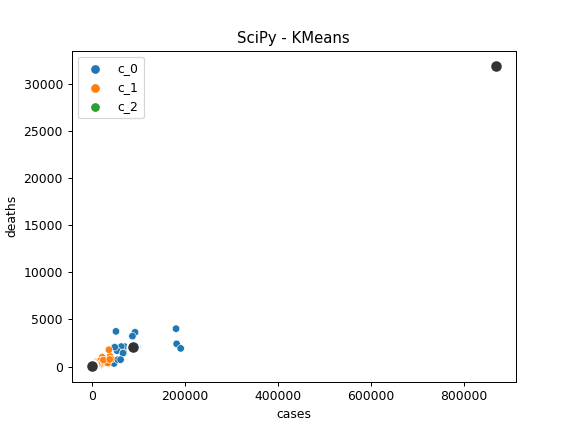

In [21]:
sns.scatterplot(data=df_kmeans, x='cases', y='deaths', hue=df_kmeans['cluster'])
sns.scatterplot(x=centroides_km[:, 0], y=centroides_km[:, 1], marker='o', s=100, color='.2', linewidth=1.5)
plt.title('SciPy - KMeans')
plt.show()

<IPython.core.display.Javascript object>


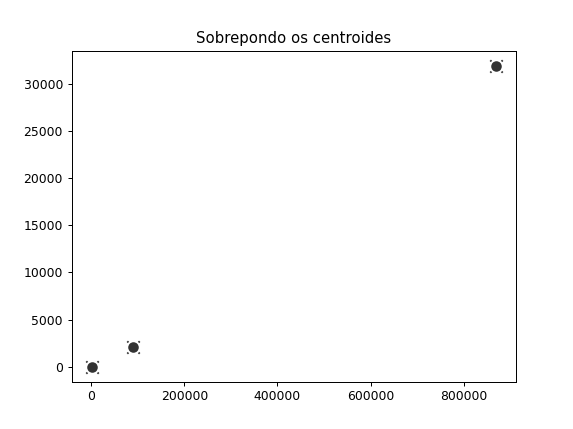

/home/hbrandao/Projects/post-grad-iesb-ai/venv/lib/python3.8/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


In [22]:
sns.scatterplot(x=cent_xs, y=cent_ys, marker='x', s=100, color='.2', linewidth=1.5)
sns.scatterplot(x=centroides_km[:, 0], y=centroides_km[:, 1], marker='o', s=100, color='.2', linewidth=1.5)
plt.title('Sobrepondo os centroides')
plt.show()

In [23]:
custo = []
qnt_k = range(1,20)
for k in qnt_k:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df[['cases','deaths']])
    custo.append(kmeanModel.inertia_)

<IPython.core.display.Javascript object>


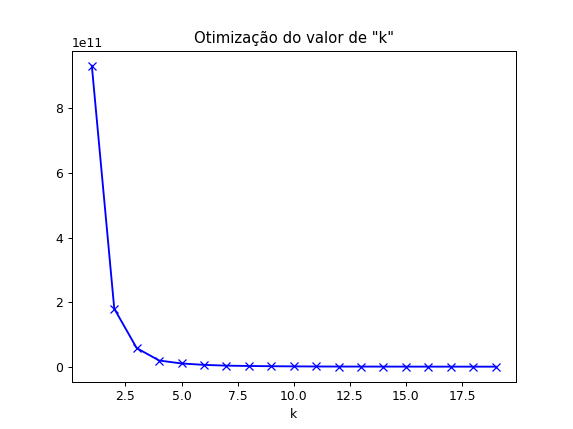

In [24]:
plt.plot(qnt_k, custo, 'bx-')
plt.xlabel('k')
plt.title('Otimização do valor de "k"')
plt.show()

# PAM

In [25]:
def custo(u, v):
    dx = u[0] - v[0]
    dy = u[1] - v[1]
    return dx**2 + dy**2

In [26]:
def mse(medoide, pontos):
    n = len(pontos)
    if n == 0:
        return 0
    else:
        acc = []
        for p in pontos:
            dx = (medoide[0] - p[0])**2
            dy = (medoide[1] - p[1])**2
            acc.append(dx + dy)
        return sum(acc)/n

In [27]:
def diff(li1, li2):
    li_dif = [i for i in li1 + li2 if i not in li1 or i not in li2]
    return li_dif

def alternar_medoide(pontos, todos_medoides):
#     tup_pontos = [tuple(p) for p in pontos]
#     tup_meds = [tuple(med) for med in todos_medoides]
#     diff = list(set(tup_pontos) - set(tup_meds))

#     print(f'Qnt medoides usados: {len(todos_medoides)}')
#     _diff = diff(pontos, todos_medoides)
#     print(f'Pontos restantes: {len(_diff)}\n')
    return sortear_centroide_inicial(_diff)

In [28]:
def fit_pam(pontos, k, alfa):
    num_pontos = len(pontos)

    custo_total_medio = 0
    clusters = {}
    medoides = {1: {}}
    custos_totais = {1: {}}
    pontos_usados = []

    for i in range(k):
        medoides[1][i] = sortear_centroide_inicial(pontos)
        pontos_usados.append(medoides[1][i])

    itr = 1
    parada = 0
    while True:
        print(f'\n# {itr} ----------------------------------------- #')
        print(f'Medoides: {list(medoides[itr].values())}')

        for c in range(k):
            clusters[c] = []

        for p in pontos:
            _custos = [custo(m, p) for m in medoides[itr].values()]
            clusters[_custos.index(min(_custos))].append(p)
        for c in clusters:
            print(f"- Cluster {c} tem {len(clusters[c])} elementos")

        custos_totais[itr] = {}
        for m in medoides[itr]:
            custos_totais[itr][m] = mse(medoides[itr][m], clusters[m])
        novo_custo_total_medio = sum(custos_totais[itr].values())/k
#         print(f'$1: {custo_total_medio:.2f}\n$2: {novo_custo_total_medio:.2f}')

        if novo_custo_total_medio < custo_total_medio:
            parada = 0
        else:
            parada += 1
            print(f'\t\t\t\tParada: {parada}')
            if itr > 1:
                medoides[itr] = medoides[itr-1]
            if parada == alfa:
                break
            custo_total_medio = novo_custo_total_medio

        if len(pontos_usados) == num_pontos:
            break

        itr += 1
        medoides[itr] = medoides[itr - 1]
        # sortear sem reposição
        p = sortear_centroide_inicial(pontos) 
        dd = [distancia(m, p) for m in medoides[itr].values()]
        ind = dd.index(min(dd))
        medoides[itr][ind] = p
        pontos_usados.append(p)
        
    return medoides[itr], clusters

medoides, clusters = fit_pam(pontos.tolist(), k=3, alfa=300)


# 1 ----------------------------------------- #
Medoides: [[250, 24], [23, 0], [1475, 11]]
- Cluster 0 tem 439 elementos
- Cluster 1 tem 795 elementos
- Cluster 2 tem 336 elementos
				Parada: 1

# 2 ----------------------------------------- #
Medoides: [[250, 24], [106, 0], [1475, 11]]
- Cluster 0 tem 373 elementos
- Cluster 1 tem 861 elementos
- Cluster 2 tem 336 elementos
				Parada: 2

# 3 ----------------------------------------- #
Medoides: [[624, 11], [106, 0], [1475, 11]]
- Cluster 0 tem 222 elementos
- Cluster 1 tem 1037 elementos
- Cluster 2 tem 311 elementos
				Parada: 3

# 4 ----------------------------------------- #
Medoides: [[624, 11], [172, 15], [1475, 11]]
- Cluster 0 tem 190 elementos
- Cluster 1 tem 1069 elementos
- Cluster 2 tem 311 elementos
				Parada: 4

# 5 ----------------------------------------- #
Medoides: [[624, 11], [79, 0], [1475, 11]]
- Cluster 0 tem 230 elementos
- Cluster 1 tem 1029 elementos
- Cluster 2 tem 311 elementos

# 6 ----------------------

- Cluster 0 tem 118 elementos
- Cluster 1 tem 1366 elementos
- Cluster 2 tem 86 elementos

# 84 ----------------------------------------- #
Medoides: [[3572, 62], [61, 7], [10318, 196]]
- Cluster 0 tem 143 elementos
- Cluster 1 tem 1341 elementos
- Cluster 2 tem 86 elementos

# 85 ----------------------------------------- #
Medoides: [[3572, 62], [117, 0], [10318, 196]]
- Cluster 0 tem 138 elementos
- Cluster 1 tem 1346 elementos
- Cluster 2 tem 86 elementos

# 86 ----------------------------------------- #
Medoides: [[3572, 62], [141, 16], [10318, 196]]
- Cluster 0 tem 138 elementos
- Cluster 1 tem 1346 elementos
- Cluster 2 tem 86 elementos

# 87 ----------------------------------------- #
Medoides: [[3572, 62], [178, 0], [10318, 196]]
- Cluster 0 tem 137 elementos
- Cluster 1 tem 1347 elementos
- Cluster 2 tem 86 elementos

# 88 ----------------------------------------- #
Medoides: [[3572, 62], [11, 0], [10318, 196]]
- Cluster 0 tem 145 elementos
- Cluster 1 tem 1339 elementos
- Clu

Medoides: [[9158, 297], [32, 0], [41917, 800]]
- Cluster 0 tem 91 elementos
- Cluster 1 tem 1454 elementos
- Cluster 2 tem 25 elementos

# 175 ----------------------------------------- #
Medoides: [[9158, 297], [59, 0], [41917, 800]]
- Cluster 0 tem 91 elementos
- Cluster 1 tem 1454 elementos
- Cluster 2 tem 25 elementos

# 176 ----------------------------------------- #
Medoides: [[9158, 297], [185, 0], [41917, 800]]
- Cluster 0 tem 91 elementos
- Cluster 1 tem 1454 elementos
- Cluster 2 tem 25 elementos

# 177 ----------------------------------------- #
Medoides: [[9158, 297], [54, 0], [41917, 800]]
- Cluster 0 tem 91 elementos
- Cluster 1 tem 1454 elementos
- Cluster 2 tem 25 elementos

# 178 ----------------------------------------- #
Medoides: [[9158, 297], [4, 0], [41917, 800]]
- Cluster 0 tem 91 elementos
- Cluster 1 tem 1454 elementos
- Cluster 2 tem 25 elementos

# 179 ----------------------------------------- #
Medoides: [[9158, 297], [63, 0], [41917, 800]]
- Cluster 0 tem 91

- Cluster 0 tem 75 elementos
- Cluster 1 tem 1472 elementos
- Cluster 2 tem 23 elementos
				Parada: 2

# 252 ----------------------------------------- #
Medoides: [[11652, 480], [134, 0], [47715, 341]]
- Cluster 0 tem 74 elementos
- Cluster 1 tem 1473 elementos
- Cluster 2 tem 23 elementos

# 253 ----------------------------------------- #
Medoides: [[11652, 480], [103, 3], [47715, 341]]
- Cluster 0 tem 75 elementos
- Cluster 1 tem 1472 elementos
- Cluster 2 tem 23 elementos

# 254 ----------------------------------------- #
Medoides: [[11652, 480], [163, 0], [47715, 341]]
- Cluster 0 tem 74 elementos
- Cluster 1 tem 1473 elementos
- Cluster 2 tem 23 elementos

# 255 ----------------------------------------- #
Medoides: [[11652, 480], [22, 0], [47715, 341]]
- Cluster 0 tem 75 elementos
- Cluster 1 tem 1472 elementos
- Cluster 2 tem 23 elementos
				Parada: 1

# 256 ----------------------------------------- #
Medoides: [[11652, 480], [5204, 97], [47715, 341]]
- Cluster 0 tem 46 element

- Cluster 0 tem 24 elementos
- Cluster 1 tem 1525 elementos
- Cluster 2 tem 21 elementos

# 302 ----------------------------------------- #
Medoides: [[24380, 667], [3131, 77], [47715, 341]]
- Cluster 0 tem 21 elementos
- Cluster 1 tem 1528 elementos
- Cluster 2 tem 21 elementos

# 303 ----------------------------------------- #
Medoides: [[24380, 667], [319, 2], [47715, 341]]
- Cluster 0 tem 24 elementos
- Cluster 1 tem 1525 elementos
- Cluster 2 tem 21 elementos

# 304 ----------------------------------------- #
Medoides: [[24380, 667], [835, 19], [47715, 341]]
- Cluster 0 tem 23 elementos
- Cluster 1 tem 1526 elementos
- Cluster 2 tem 21 elementos

# 305 ----------------------------------------- #
Medoides: [[24380, 667], [231, 10], [47715, 341]]
- Cluster 0 tem 24 elementos
- Cluster 1 tem 1525 elementos
- Cluster 2 tem 21 elementos

# 306 ----------------------------------------- #
Medoides: [[24380, 667], [286, 0], [47715, 341]]
- Cluster 0 tem 24 elementos
- Cluster 1 tem 1525 e

- Cluster 1 tem 1499 elementos
- Cluster 2 tem 23 elementos

# 450 ----------------------------------------- #
Medoides: [[16125, 313], [143, 0], [41917, 800]]
- Cluster 0 tem 47 elementos
- Cluster 1 tem 1500 elementos
- Cluster 2 tem 23 elementos

# 451 ----------------------------------------- #
Medoides: [[16125, 313], [2453, 22], [41917, 800]]
- Cluster 0 tem 37 elementos
- Cluster 1 tem 1510 elementos
- Cluster 2 tem 23 elementos

# 452 ----------------------------------------- #
Medoides: [[16125, 313], [370, 3], [41917, 800]]
- Cluster 0 tem 47 elementos
- Cluster 1 tem 1500 elementos
- Cluster 2 tem 23 elementos

# 453 ----------------------------------------- #
Medoides: [[16125, 313], [826, 10], [41917, 800]]
- Cluster 0 tem 46 elementos
- Cluster 1 tem 1501 elementos
- Cluster 2 tem 23 elementos

# 454 ----------------------------------------- #
Medoides: [[16125, 313], [1369, 67], [41917, 800]]
- Cluster 0 tem 42 elementos
- Cluster 1 tem 1505 elementos
- Cluster 2 tem 23 

- Cluster 1 tem 1530 elementos
- Cluster 2 tem 21 elementos

# 512 ----------------------------------------- #
Medoides: [[27995, 479], [56, 0], [41917, 800]]
- Cluster 0 tem 19 elementos
- Cluster 1 tem 1530 elementos
- Cluster 2 tem 21 elementos

# 513 ----------------------------------------- #
Medoides: [[27995, 479], [58, 0], [41917, 800]]
- Cluster 0 tem 19 elementos
- Cluster 1 tem 1530 elementos
- Cluster 2 tem 21 elementos

# 514 ----------------------------------------- #
Medoides: [[27995, 479], [170, 0], [41917, 800]]
- Cluster 0 tem 19 elementos
- Cluster 1 tem 1530 elementos
- Cluster 2 tem 21 elementos

# 515 ----------------------------------------- #
Medoides: [[27995, 479], [366, 0], [41917, 800]]
- Cluster 0 tem 19 elementos
- Cluster 1 tem 1530 elementos
- Cluster 2 tem 21 elementos

# 516 ----------------------------------------- #
Medoides: [[27995, 479], [180, 0], [41917, 800]]
- Cluster 0 tem 19 elementos
- Cluster 1 tem 1530 elementos
- Cluster 2 tem 21 element

Medoides: [[27995, 479], [162, 0], [47715, 341]]
- Cluster 0 tem 20 elementos
- Cluster 1 tem 1530 elementos
- Cluster 2 tem 20 elementos

# 593 ----------------------------------------- #
Medoides: [[18121, 625], [162, 0], [47715, 341]]
- Cluster 0 tem 39 elementos
- Cluster 1 tem 1508 elementos
- Cluster 2 tem 23 elementos

# 594 ----------------------------------------- #
Medoides: [[18121, 625], [6188, 182], [47715, 341]]
- Cluster 0 tem 22 elementos
- Cluster 1 tem 1525 elementos
- Cluster 2 tem 23 elementos

# 595 ----------------------------------------- #
Medoides: [[18121, 625], [1475, 11], [47715, 341]]
- Cluster 0 tem 36 elementos
- Cluster 1 tem 1511 elementos
- Cluster 2 tem 23 elementos

# 596 ----------------------------------------- #
Medoides: [[18121, 625], [11, 0], [47715, 341]]
- Cluster 0 tem 41 elementos
- Cluster 1 tem 1506 elementos
- Cluster 2 tem 23 elementos

# 597 ----------------------------------------- #
Medoides: [[18121, 625], [251, 0], [47715, 341]]
- 

Medoides: [[24427, 431], [24, 13], [68285, 1486]]
- Cluster 0 tem 28 elementos
- Cluster 1 tem 1525 elementos
- Cluster 2 tem 17 elementos

# 745 ----------------------------------------- #
Medoides: [[24427, 431], [768, 20], [68285, 1486]]
- Cluster 0 tem 27 elementos
- Cluster 1 tem 1526 elementos
- Cluster 2 tem 17 elementos

# 746 ----------------------------------------- #
Medoides: [[24427, 431], [79, 0], [68285, 1486]]
- Cluster 0 tem 28 elementos
- Cluster 1 tem 1525 elementos
- Cluster 2 tem 17 elementos

# 747 ----------------------------------------- #
Medoides: [[24427, 431], [3522, 254], [68285, 1486]]
- Cluster 0 tem 24 elementos
- Cluster 1 tem 1529 elementos
- Cluster 2 tem 17 elementos

# 748 ----------------------------------------- #
Medoides: [[24427, 431], [31, 0], [68285, 1486]]
- Cluster 0 tem 28 elementos
- Cluster 1 tem 1525 elementos
- Cluster 2 tem 17 elementos

# 749 ----------------------------------------- #
Medoides: [[24427, 431], [7344, 158], [68285, 14

- Cluster 2 tem 1 elementos

# 801 ----------------------------------------- #
Medoides: [[24427, 431], [20, 0], [868824, 31887]]
- Cluster 0 tem 44 elementos
- Cluster 1 tem 1525 elementos
- Cluster 2 tem 1 elementos

# 802 ----------------------------------------- #
Medoides: [[24427, 431], [439, 57], [868824, 31887]]
- Cluster 0 tem 44 elementos
- Cluster 1 tem 1525 elementos
- Cluster 2 tem 1 elementos

# 803 ----------------------------------------- #
Medoides: [[24427, 431], [3261, 29], [868824, 31887]]
- Cluster 0 tem 40 elementos
- Cluster 1 tem 1529 elementos
- Cluster 2 tem 1 elementos

# 804 ----------------------------------------- #
Medoides: [[24427, 431], [28, 0], [868824, 31887]]
- Cluster 0 tem 44 elementos
- Cluster 1 tem 1525 elementos
- Cluster 2 tem 1 elementos

# 805 ----------------------------------------- #
Medoides: [[24427, 431], [8, 0], [868824, 31887]]
- Cluster 0 tem 44 elementos
- Cluster 1 tem 1525 elementos
- Cluster 2 tem 1 elementos

# 806 -----------

Medoides: [[7294, 181], [63, 0], [868824, 31887]]
- Cluster 0 tem 140 elementos
- Cluster 1 tem 1429 elementos
- Cluster 2 tem 1 elementos

# 859 ----------------------------------------- #
Medoides: [[7294, 181], [134, 0], [868824, 31887]]
- Cluster 0 tem 137 elementos
- Cluster 1 tem 1432 elementos
- Cluster 2 tem 1 elementos

# 860 ----------------------------------------- #
Medoides: [[8795, 516], [134, 0], [868824, 31887]]
- Cluster 0 tem 117 elementos
- Cluster 1 tem 1452 elementos
- Cluster 2 tem 1 elementos

# 861 ----------------------------------------- #
Medoides: [[8795, 516], [5, 0], [868824, 31887]]
- Cluster 0 tem 120 elementos
- Cluster 1 tem 1449 elementos
- Cluster 2 tem 1 elementos

# 862 ----------------------------------------- #
Medoides: [[8795, 516], [370, 3], [868824, 31887]]
- Cluster 0 tem 115 elementos
- Cluster 1 tem 1454 elementos
- Cluster 2 tem 1 elementos

# 863 ----------------------------------------- #
Medoides: [[8795, 516], [130, 9], [868824, 31887

- Cluster 2 tem 1 elementos

# 948 ----------------------------------------- #
Medoides: [[15225, 310], [19, 0], [868824, 31887]]
- Cluster 0 tem 76 elementos
- Cluster 1 tem 1493 elementos
- Cluster 2 tem 1 elementos

# 949 ----------------------------------------- #
Medoides: [[15225, 310], [335, 6], [868824, 31887]]
- Cluster 0 tem 74 elementos
- Cluster 1 tem 1495 elementos
- Cluster 2 tem 1 elementos

# 950 ----------------------------------------- #
Medoides: [[15225, 310], [10, 0], [868824, 31887]]
- Cluster 0 tem 76 elementos
- Cluster 1 tem 1493 elementos
- Cluster 2 tem 1 elementos

# 951 ----------------------------------------- #
Medoides: [[15225, 310], [130, 0], [868824, 31887]]
- Cluster 0 tem 74 elementos
- Cluster 1 tem 1495 elementos
- Cluster 2 tem 1 elementos

# 952 ----------------------------------------- #
Medoides: [[15225, 310], [11, 0], [868824, 31887]]
- Cluster 0 tem 76 elementos
- Cluster 1 tem 1493 elementos
- Cluster 2 tem 1 elementos

# 953 -------------

- Cluster 2 tem 1 elementos

# 1062 ----------------------------------------- #
Medoides: [[63344, 2129], [180, 0], [868824, 31887]]
- Cluster 0 tem 22 elementos
- Cluster 1 tem 1547 elementos
- Cluster 2 tem 1 elementos

# 1063 ----------------------------------------- #
Medoides: [[63344, 2129], [29, 0], [868824, 31887]]
- Cluster 0 tem 22 elementos
- Cluster 1 tem 1547 elementos
- Cluster 2 tem 1 elementos

# 1064 ----------------------------------------- #
Medoides: [[63344, 2129], [259, 0], [868824, 31887]]
- Cluster 0 tem 22 elementos
- Cluster 1 tem 1547 elementos
- Cluster 2 tem 1 elementos

# 1065 ----------------------------------------- #
Medoides: [[63344, 2129], [92, 10], [868824, 31887]]
- Cluster 0 tem 22 elementos
- Cluster 1 tem 1547 elementos
- Cluster 2 tem 1 elementos

# 1066 ----------------------------------------- #
Medoides: [[63344, 2129], [1495, 31], [868824, 31887]]
- Cluster 0 tem 22 elementos
- Cluster 1 tem 1547 elementos
- Cluster 2 tem 1 elementos

# 106

Medoides: [[27995, 479], [63, 0], [868824, 31887]]
- Cluster 0 tem 39 elementos
- Cluster 1 tem 1530 elementos
- Cluster 2 tem 1 elementos

# 1195 ----------------------------------------- #
Medoides: [[27995, 479], [1, 0], [868824, 31887]]
- Cluster 0 tem 40 elementos
- Cluster 1 tem 1529 elementos
- Cluster 2 tem 1 elementos

# 1196 ----------------------------------------- #
Medoides: [[27995, 479], [1, 0], [868824, 31887]]
- Cluster 0 tem 40 elementos
- Cluster 1 tem 1529 elementos
- Cluster 2 tem 1 elementos

# 1197 ----------------------------------------- #
Medoides: [[27995, 479], [36, 0], [868824, 31887]]
- Cluster 0 tem 39 elementos
- Cluster 1 tem 1530 elementos
- Cluster 2 tem 1 elementos

# 1198 ----------------------------------------- #
Medoides: [[26770, 635], [36, 0], [868824, 31887]]
- Cluster 0 tem 41 elementos
- Cluster 1 tem 1528 elementos
- Cluster 2 tem 1 elementos

# 1199 ----------------------------------------- #
Medoides: [[26770, 635], [31, 0], [868824, 3188


# 1285 ----------------------------------------- #
Medoides: [[71121, 2117], [2, 0], [868824, 31887]]
- Cluster 0 tem 20 elementos
- Cluster 1 tem 1549 elementos
- Cluster 2 tem 1 elementos

# 1286 ----------------------------------------- #
Medoides: [[71121, 2117], [59, 0], [868824, 31887]]
- Cluster 0 tem 20 elementos
- Cluster 1 tem 1549 elementos
- Cluster 2 tem 1 elementos

# 1287 ----------------------------------------- #
Medoides: [[71121, 2117], [821, 11], [868824, 31887]]
- Cluster 0 tem 20 elementos
- Cluster 1 tem 1549 elementos
- Cluster 2 tem 1 elementos

# 1288 ----------------------------------------- #
Medoides: [[71121, 2117], [5589, 122], [868824, 31887]]
- Cluster 0 tem 19 elementos
- Cluster 1 tem 1550 elementos
- Cluster 2 tem 1 elementos

# 1289 ----------------------------------------- #
Medoides: [[71121, 2117], [454, 2], [868824, 31887]]
- Cluster 0 tem 20 elementos
- Cluster 1 tem 1549 elementos
- Cluster 2 tem 1 elementos

# 1290 --------------------------

Medoides: [[87378, 3236], [13, 0], [868824, 31887]]
- Cluster 0 tem 16 elementos
- Cluster 1 tem 1553 elementos
- Cluster 2 tem 1 elementos

# 1374 ----------------------------------------- #
Medoides: [[87378, 3236], [23, 3], [868824, 31887]]
- Cluster 0 tem 16 elementos
- Cluster 1 tem 1553 elementos
- Cluster 2 tem 1 elementos

# 1375 ----------------------------------------- #
Medoides: [[87378, 3236], [44, 0], [868824, 31887]]
- Cluster 0 tem 16 elementos
- Cluster 1 tem 1553 elementos
- Cluster 2 tem 1 elementos

# 1376 ----------------------------------------- #
Medoides: [[87378, 3236], [1842, 30], [868824, 31887]]
- Cluster 0 tem 16 elementos
- Cluster 1 tem 1553 elementos
- Cluster 2 tem 1 elementos

# 1377 ----------------------------------------- #
Medoides: [[87378, 3236], [379, 0], [868824, 31887]]
- Cluster 0 tem 16 elementos
- Cluster 1 tem 1553 elementos
- Cluster 2 tem 1 elementos

# 1378 ----------------------------------------- #
Medoides: [[87378, 3236], [56, 0], [

Medoides: [[66911, 1433], [826, 64], [868824, 31887]]
- Cluster 0 tem 22 elementos
- Cluster 1 tem 1547 elementos
- Cluster 2 tem 1 elementos

# 1535 ----------------------------------------- #
Medoides: [[66911, 1433], [6, 0], [868824, 31887]]
- Cluster 0 tem 22 elementos
- Cluster 1 tem 1547 elementos
- Cluster 2 tem 1 elementos

# 1536 ----------------------------------------- #
Medoides: [[66911, 1433], [497, 0], [868824, 31887]]
- Cluster 0 tem 22 elementos
- Cluster 1 tem 1547 elementos
- Cluster 2 tem 1 elementos

# 1537 ----------------------------------------- #
Medoides: [[66911, 1433], [63, 0], [868824, 31887]]
- Cluster 0 tem 22 elementos
- Cluster 1 tem 1547 elementos
- Cluster 2 tem 1 elementos

# 1538 ----------------------------------------- #
Medoides: [[66911, 1433], [1793, 77], [868824, 31887]]
- Cluster 0 tem 20 elementos
- Cluster 1 tem 1549 elementos
- Cluster 2 tem 1 elementos

# 1539 ----------------------------------------- #
Medoides: [[66911, 1433], [103, 3],

In [29]:
df_pam = pd.DataFrame(_to_df(clusters), columns=['cases', 'deaths', 'cluster'])
df_pam.shape

(1570, 3)

In [30]:
df_pam.head()

,cases,deaths,cluster
0,71121,2117,0
1,97593,2079,0
2,63344,2129,0
3,39302,1106,0
4,41917,800,0


In [31]:
medoides_xs = [c[0] for c in medoides.values()]
medoides_ys = [c[1] for c in medoides.values()]

<IPython.core.display.Javascript object>


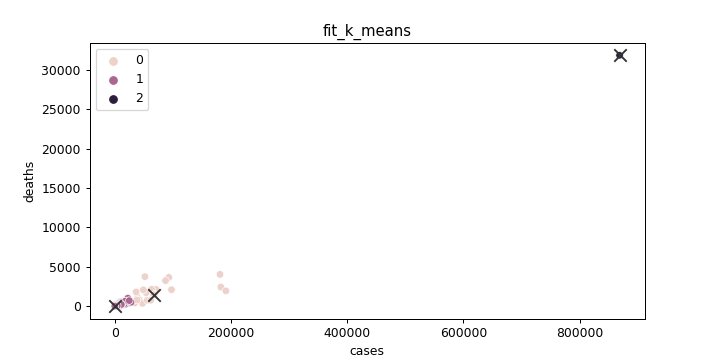

/home/hbrandao/Projects/post-grad-iesb-ai/venv/lib/python3.8/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


In [32]:
plt.figure(figsize=(8, 4), dpi=100)
sns.scatterplot(data=df_pam, x='cases', y='deaths', hue=df_pam['cluster'])
sns.scatterplot(x=medoides_xs, y=medoides_ys, marker='x', s=100, color='.2', linewidth=1.5)
plt.title('fit_k_means')
plt.show()

In [34]:
from sklearn_extra.cluster import KMedoids

In [35]:
kmedoid = KMedoids(n_clusters=3)

In [36]:
kmedoid.fit(df[['cases','deaths']])

KMedoids(n_clusters=3)

In [37]:
centroides_kmedoid = kmedoid.cluster_centers_
centroides_kmedoid

array([[ 7294,   181],
       [  103,     3],
       [63344,  2129]])

<IPython.core.display.Javascript object>


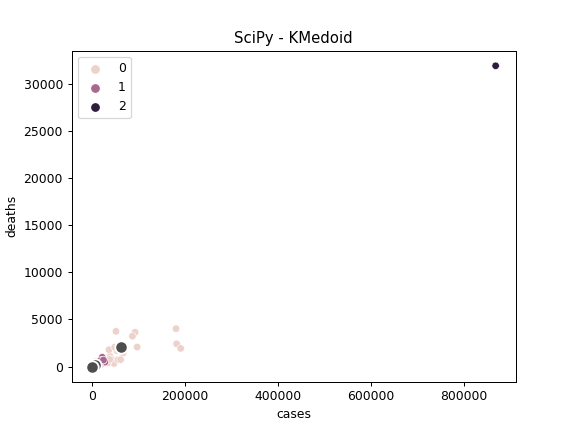

In [38]:
sns.scatterplot(data=df_pam, x='cases', y='deaths', hue=df_pam['cluster'])
sns.scatterplot(x=centroides_kmedoid[:, 0], y=centroides_kmedoid[:, 1], marker='o', s=100, color='.3', linewidth=1.5)
plt.title('SciPy - KMedoid')
plt.show()

<IPython.core.display.Javascript object>


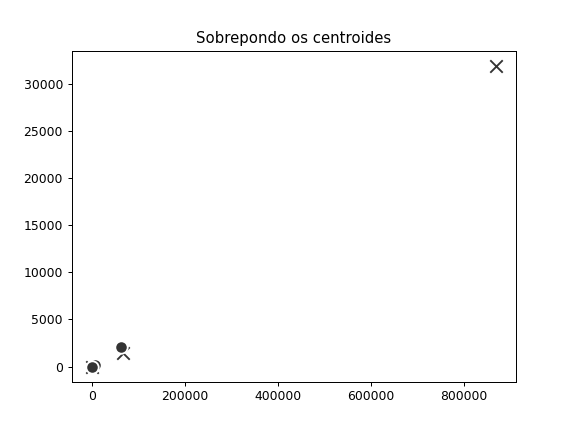

/home/hbrandao/Projects/post-grad-iesb-ai/venv/lib/python3.8/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


In [39]:
sns.scatterplot(x=medoides_xs, y=medoides_ys, marker='x', s=100, color='.2', linewidth=1.5)
sns.scatterplot(x=centroides_kmedoid[:, 0], y=centroides_kmedoid[:, 1], marker='o', s=100, color='.2', linewidth=1.5)
plt.title('Sobrepondo os centroides')
plt.show()

In [40]:
custo = []
qnt_k = range(1,20)
for k in qnt_k:
    kmedoidmodel = KMedoids(n_clusters=k)
    kmedoidmodel.fit(df[['cases','deaths']])
    custo.append(kmedoidmodel.inertia_)

/home/hbrandao/Projects/post-grad-iesb-ai/venv/lib/python3.8/site-packages/sklearn_extra/cluster/_k_medoids.py:275: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  warnings.warn(
/home/hbrandao/Projects/post-grad-iesb-ai/venv/lib/python3.8/site-packages/sklearn_extra/cluster/_k_medoids.py:275: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  warnings.warn(
/home/hbrandao/Projects/post-grad-iesb-ai/venv/lib/python3.8/site-packages/sklearn_extra/cluster/_k_medoids.py:275: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  warnings.warn(
/home/hbrandao/Projects/post-grad-iesb-ai/venv/lib/python3.8/site-packages/sklearn_extra/cluster/_k_medoids.py:275: UserWarning: Cluster 6 is empty! self.labels_[self.medoid_indices_[6]] may not be labeled with its correspo

/home/hbrandao/Projects/post-grad-iesb-ai/venv/lib/python3.8/site-packages/sklearn_extra/cluster/_k_medoids.py:275: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
/home/hbrandao/Projects/post-grad-iesb-ai/venv/lib/python3.8/site-packages/sklearn_extra/cluster/_k_medoids.py:275: UserWarning: Cluster 7 is empty! self.labels_[self.medoid_indices_[7]] may not be labeled with its corresponding cluster (7).
  warnings.warn(
/home/hbrandao/Projects/post-grad-iesb-ai/venv/lib/python3.8/site-packages/sklearn_extra/cluster/_k_medoids.py:275: UserWarning: Cluster 8 is empty! self.labels_[self.medoid_indices_[8]] may not be labeled with its corresponding cluster (8).
  warnings.warn(
/home/hbrandao/Projects/post-grad-iesb-ai/venv/lib/python3.8/site-packages/sklearn_extra/cluster/_k_medoids.py:275: UserWarning: Cluster 9 is empty! self.labels_[self.medoid_indices_[9]] may not be labeled with its correspo

<IPython.core.display.Javascript object>


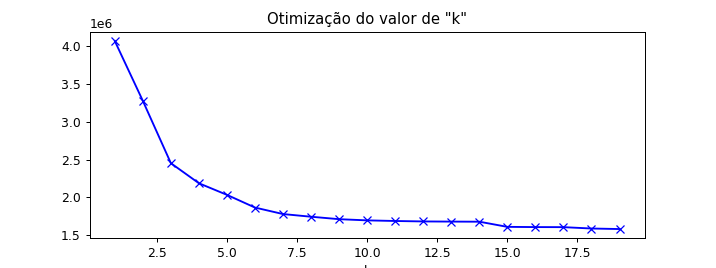

In [41]:
plt.figure(figsize=(8,3))
plt.plot(qnt_k, custo, 'bx-')
plt.xlabel('k')
plt.title('Otimização do valor de "k"')
plt.show()

# DBSCAN